### Import dependecies

In [1]:
import tensorflow as tf 
from functools import partial
from preprocess import X_train, y_train, X_valid, y_valid, X_test, y_test

### Define Fully connected convulltional neural network architecture

In [2]:
#Initial hyperparameters
BATCH_SIZE = 8
NUM_EPOCHS = 100
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=1e-4)
EARLY_STOPPING = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [3]:
#Wrap layers for convinient use
Conv2D = partial(tf.keras.layers.Conv2D, kernel_size = (3,3), padding = "SAME", activation = 'relu')
MaxPool2D = partial(tf.keras.layers.MaxPool2D, pool_size = (2,2), strides = (2,2))


In [4]:
model = tf.keras.Sequential([
    Conv2D(filters = 64, input_shape = (224, 224, 3)),
    Conv2D(filters = 64),
    MaxPool2D(),
    Conv2D(filters = 128), 
    Conv2D(filters = 128), 
    MaxPool2D(),
    Conv2D(filters = 256), 
    Conv2D(filters = 256),
    Conv2D(filters = 256),
    MaxPool2D(),
    Conv2D(filters = 512),
    Conv2D(filters = 512),
    Conv2D(filters = 512),
    MaxPool2D(),
    Conv2D(filters = 512),
    Conv2D(filters = 512),
    Conv2D(filters = 512),
    MaxPool2D(), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')

])

In [5]:
#Compiling the model
model.compile(loss = "mse", optimizer=OPTIMIZER)

In [6]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, callbacks=EARLY_STOPPING)

Epoch 1/100
44/44 [==============================] - 28s 297ms/step - loss: 0.0493 - val_loss: 0.0470
Epoch 2/100
44/44 [==============================] - 7s 151ms/step - loss: 0.0442 - val_loss: 0.0465
Epoch 3/100
44/44 [==============================] - 6s 137ms/step - loss: 0.0439 - val_loss: 0.0466
Epoch 4/100
44/44 [==============================] - 6s 136ms/step - loss: 0.0432 - val_loss: 0.0463
Epoch 5/100
44/44 [==============================] - 6s 136ms/step - loss: 0.0434 - val_loss: 0.0472
Epoch 6/100
44/44 [==============================] - 6s 136ms/step - loss: 0.0436 - val_loss: 0.0465
Epoch 7/100
44/44 [==============================] - 6s 139ms/step - loss: 0.0430 - val_loss: 0.0469
Epoch 8/100
44/44 [==============================] - 6s 146ms/step - loss: 0.0426 - val_loss: 0.0471
Epoch 9/100
44/44 [==============================] - 6s 146ms/step - loss: 0.0428 - val_loss: 0.0466
Epoch 10/100
44/44 [==============================] - 6s 148ms/step - loss: 0.0424 - val_l

### Conver h5 model into onnx 

In [ ]:
import tf2onnx 
onnx_model = tf2onnx.convert.from_keras(model)

with open('models/detection.onnx', 'wb') as f:
    f.write(onnx_model.SerializeToString())

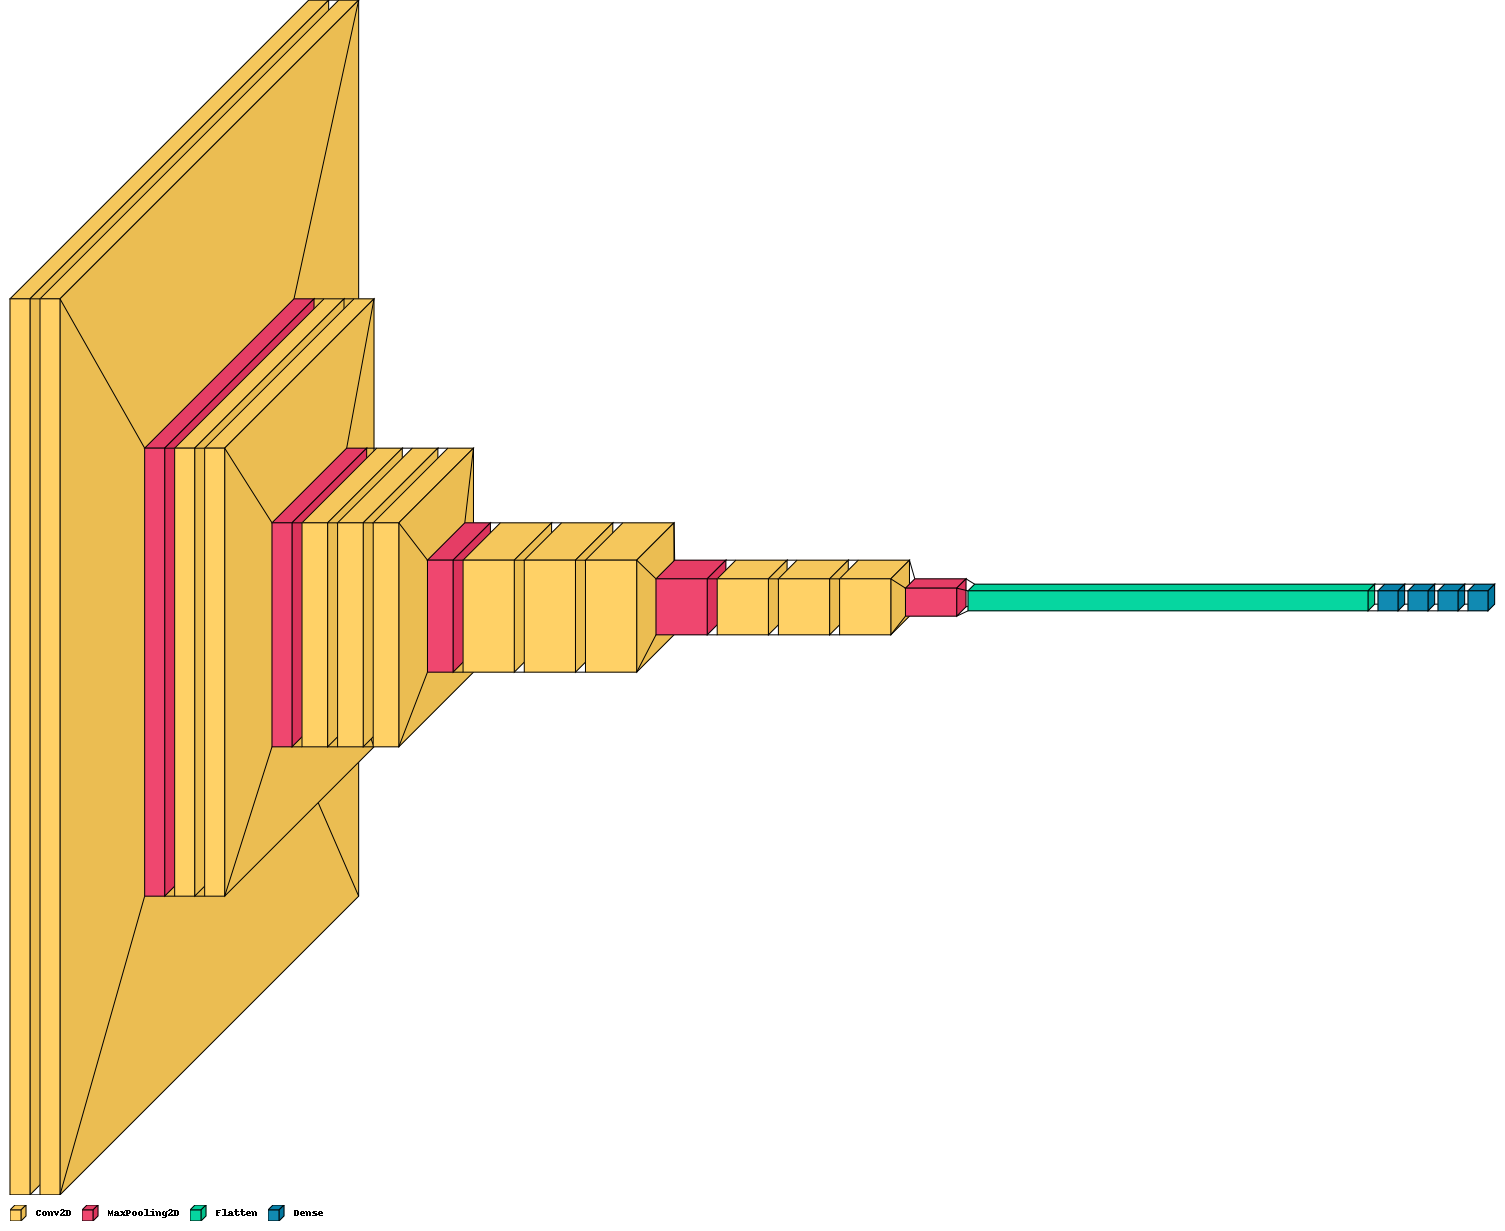

In [8]:

import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model, legend=True)

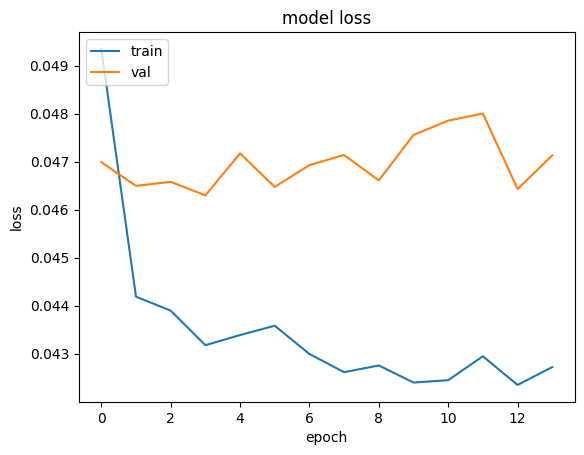

In [9]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()